Apply multiple linear regression to create a baseline model and evaluate its performance using metrics such as mean squared error (MSE) and Rsquared.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

numerical_features = ['hum', 'windspeed', 'casual', 'registered', 'hr', 'temp', 'atemp']
target = 'cnt'

X = data[numerical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.502274845778877e-25
R-squared (R2): 1.0


Apply Forward Stepwise Selection, Backward Stepwise Selection and compare the resulting models to determine which one works best for the dataset and modeling goals.

In [3]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')


numerical_features = ['hum', 'windspeed', 'casual', 'registered', 'hr', 'temp', 'atemp']
target = 'cnt'
selected_features = []

X = data[numerical_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_features_forward = []
best_mse_forward = np.inf

for i in range(1, len(numerical_features) + 1):
    for feature in numerical_features:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            X_train_current = X_train[current_features]
            X_test_current = X_test[current_features]

            model = sm.OLS(y_train, sm.add_constant(X_train_current)).fit()
            y_pred_current = model.predict(sm.add_constant(X_test_current))

            mse = mean_squared_error(y_test, y_pred_current)

            if mse < best_mse_forward:
                best_mse_forward = mse
                best_features_forward = current_features

    selected_features = best_features_forward

best_features_backward = numerical_features
best_mse_backward = np.inf

for i in range(1, len(numerical_features)):
    for feature_combination in combinations(selected_features, len(selected_features) - 1):
        current_features = list(feature_combination)
        X_train_current = X_train[current_features]
        X_test_current = X_test[current_features]

        model = sm.OLS(y_train, sm.add_constant(X_train_current)).fit()
        y_pred_current = model.predict(sm.add_constant(X_test_current))

        mse = mean_squared_error(y_test, y_pred_current)

        if mse < best_mse_backward:
            best_mse_backward = mse
            best_features_backward = current_features

    selected_features = best_features_backward

print("Forward Stepwise Selection Best Features:", best_features_forward)
print("Backward Stepwise Selection Best Features:", best_features_backward)

Forward Stepwise Selection Best Features: ['registered', 'casual', 'atemp', 'temp']
Backward Stepwise Selection Best Features: ['registered', 'casual', 'atemp']


Apply PCA to the dataset to reduce its dimensionality while preserving as much information as possible!

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

categorical_columns = ['season', 'weathersit']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

X = data[['yr', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
print("Number of components to preserve 95% variance:", pca.n_components_)



Explained Variance Ratio: [0.35338188 0.1948086  0.13354935 0.10940783 0.08431788 0.06808621
 0.05500872 0.00143953]
Number of components to preserve 95% variance: 7


Apply higher-order regression model using polynomial features and compare its performance with the baseline model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = data[['windspeed', 'atemp', 'hum', 'registered','cnt']]
y = data['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)

print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Polynomial Model Mean Squared Error: {poly_mse}")


Baseline Mean Squared Error: 0.0007355483296957718
Polynomial Model Mean Squared Error: 0.0005846759164999061


Visualize the relationships between predictor variables and the target variable using scaTer plots and regression diagnostics.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


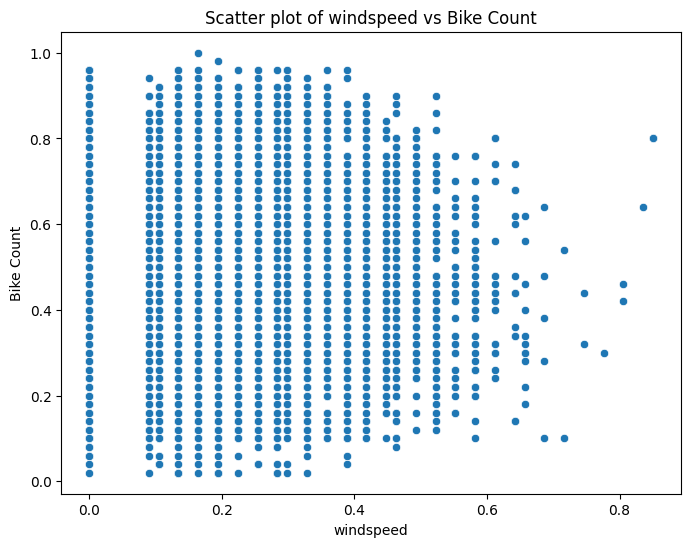

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


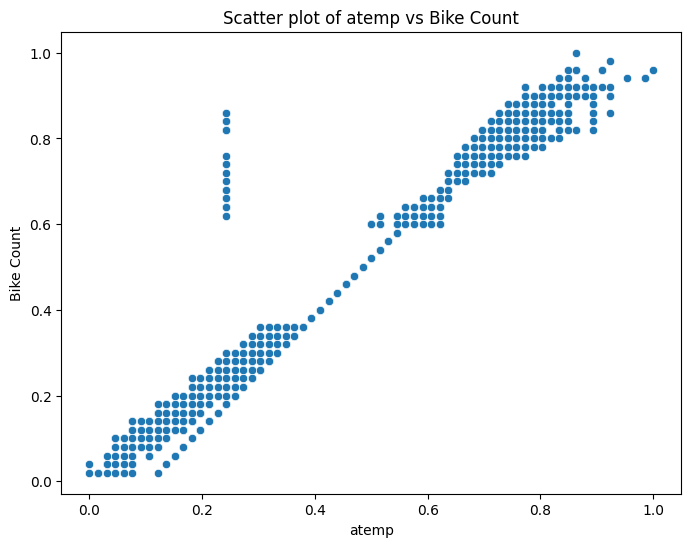

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


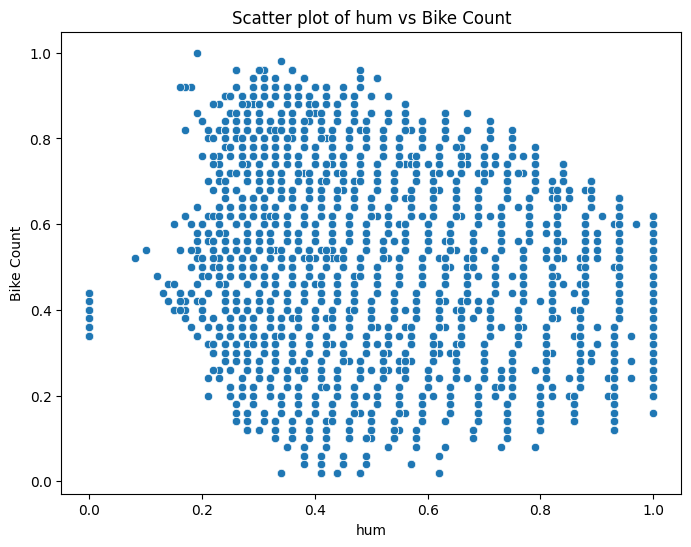

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


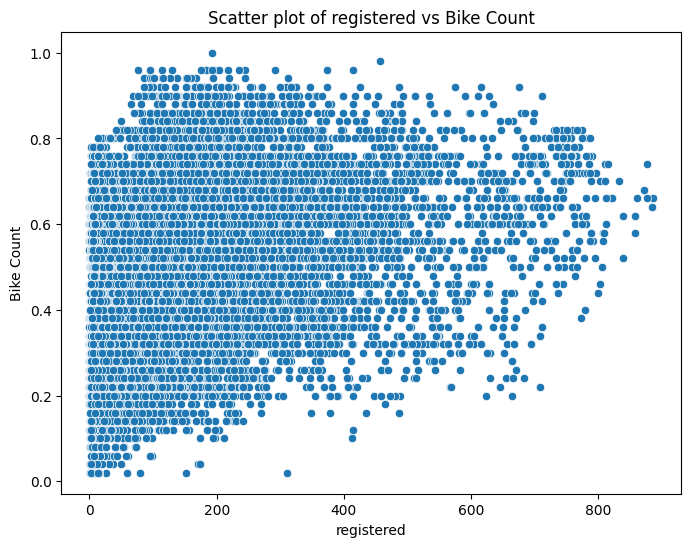

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


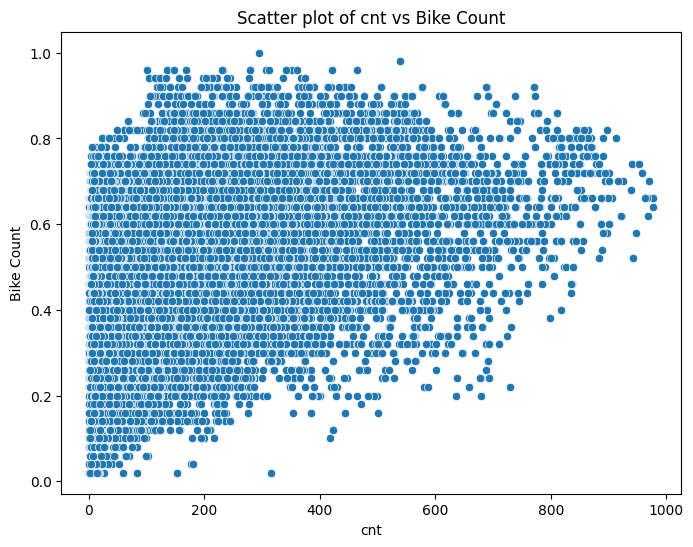

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


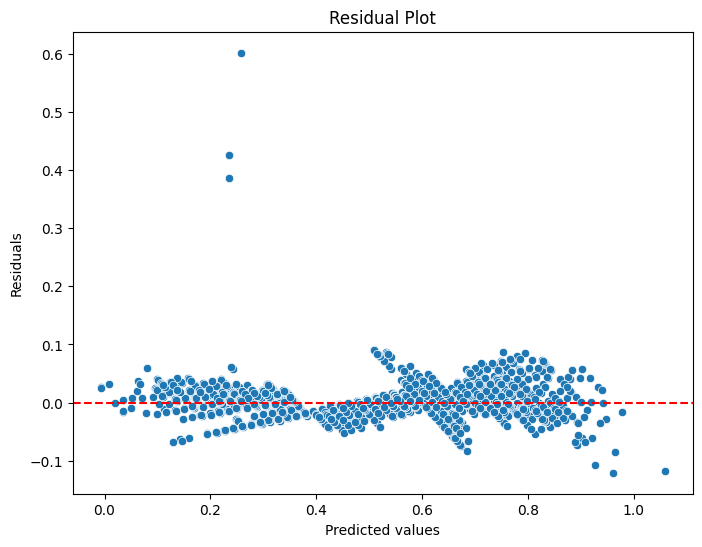

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


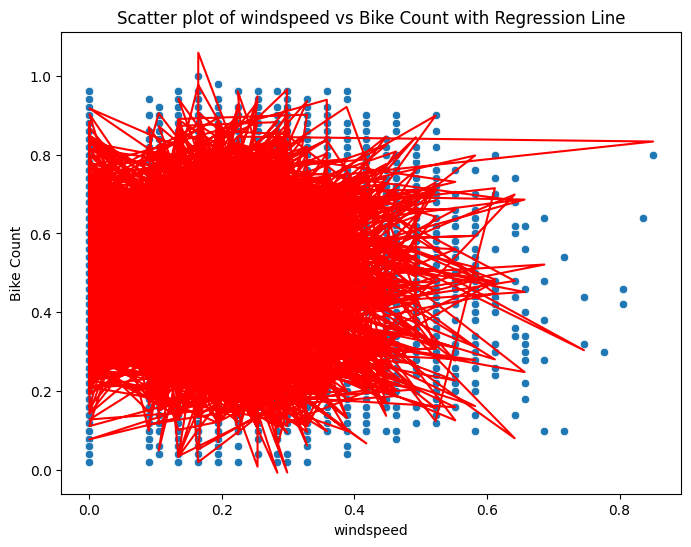

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


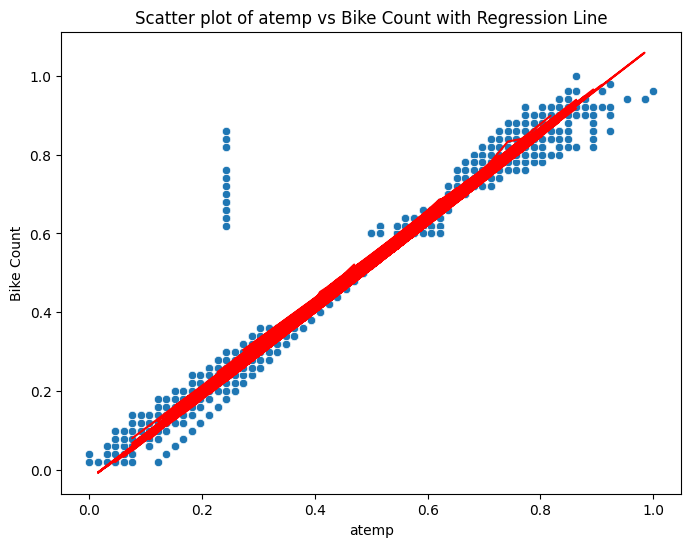

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


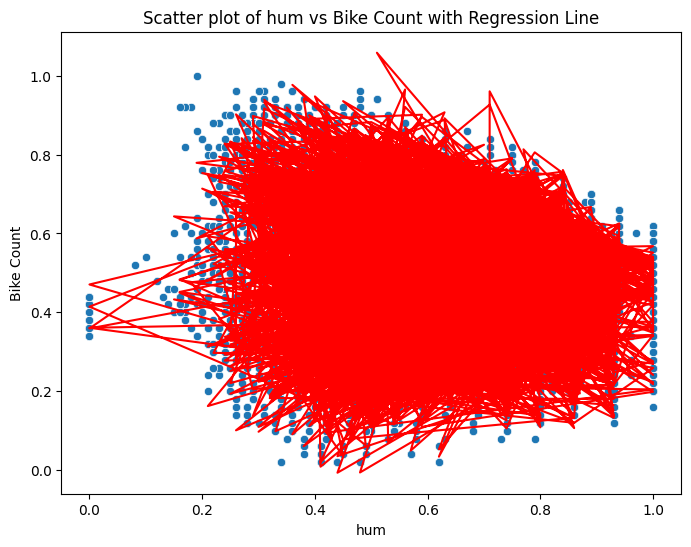

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


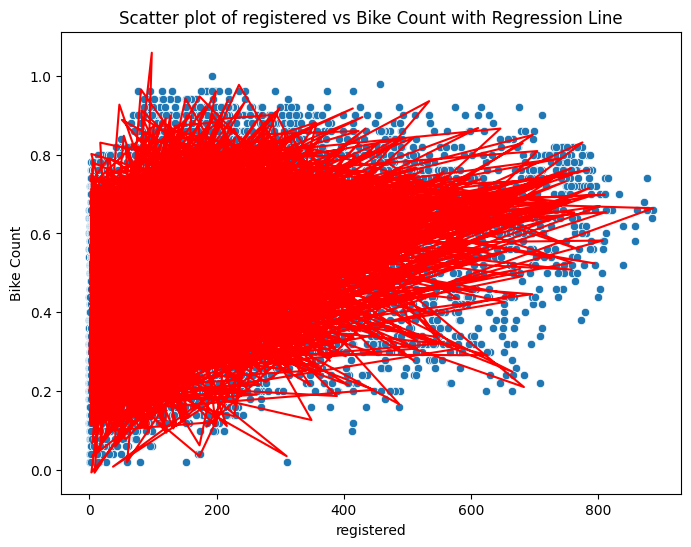

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


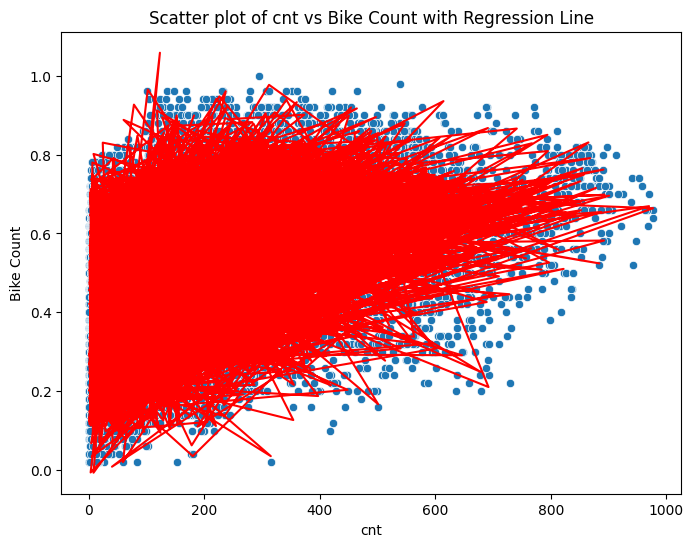

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

X = data[['windspeed', 'atemp', 'hum', 'registered','cnt']]
y = data['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f"Scatter plot of {column} vs Bike Count")
    plt.xlabel(column)
    plt.ylabel("Bike Count")
    plt.show()

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()


for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[column], y=y)
    plt.plot(X_test[column], y_pred, color='r')
    plt.title(f"Scatter plot of {column} vs Bike Count with Regression Line")
    plt.xlabel(column)
    plt.ylabel("Bike Count")
    plt.show()


Explore and implement advanced regression techniques, such as ridge regression, lasso regression, and compare their performance

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

X = data[['windspeed', 'atemp', 'hum', 'registered','cnt']]
y = data['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")


Baseline Mean Squared Error: 0.0007355483296957718
Ridge Regression Mean Squared Error: 0.0007365955519832529
Lasso Regression Mean Squared Error: 0.030305818762801057


•Apply logistic regression as a baseline classification model and evaluate its performance using metrics such as accuracy, precision, recall, and F1 score.
•Implement dimensionality reduction techniques (e.g., PCA) to reduce the
number of features while preserving information
•Implement a tree-based classification model (e.g., decision trees, random
forests) and compare its performance with the logistic regression baseline.
• Use visualizations to illustrate the separation between different classes in
the feature space.

Baseline Logistic Regression Metrics:
Accuracy: 0.28049482163406214
Precision: 0.2668527249249619
Recall: 0.28049482163406214
F1 Score: 0.262965274704116


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

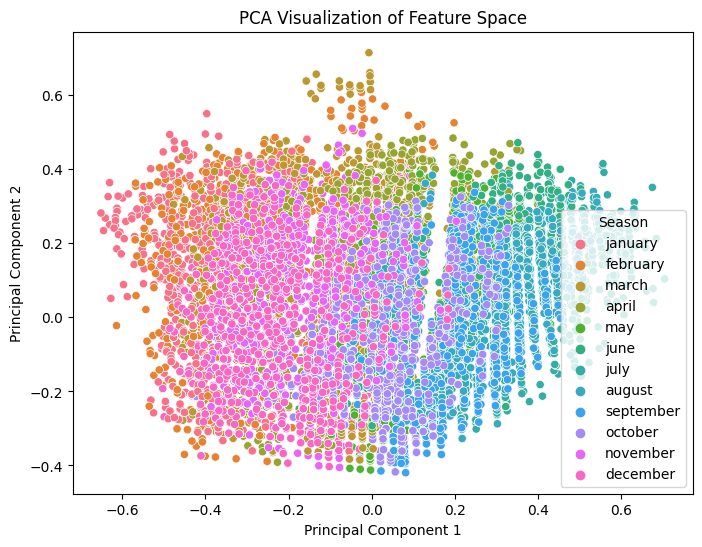

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'mnth'
features = [ 'temp','atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Season', loc='best')
plt.show()



Baseline Logistic Regression Metrics:
Accuracy: 0.5978135788262371
Precision: 0.5812081948116338
Recall: 0.5978135788262371
F1 Score: 0.5855083316060448


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

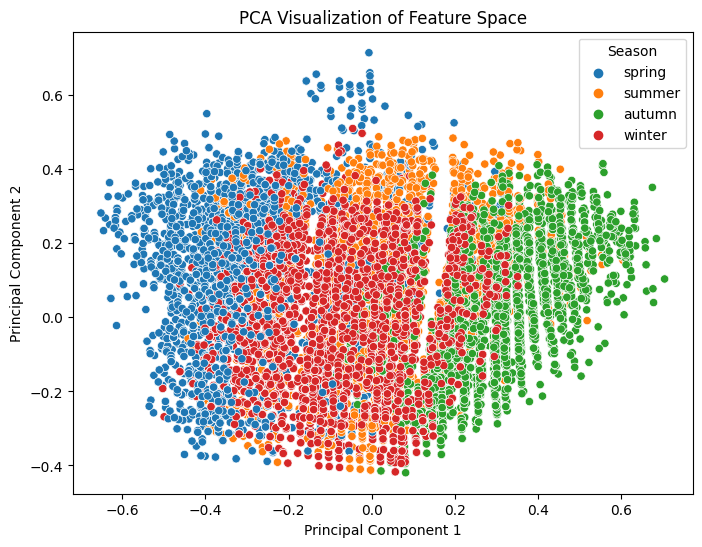

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'season'
features = ['temp', 'atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Season', loc='best')
plt.show()



Baseline Logistic Regression Metrics:
Accuracy: 0.1622554660529344
Precision: 0.16538625289702819
Recall: 0.1622554660529344
F1 Score: 0.15234326460714384


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

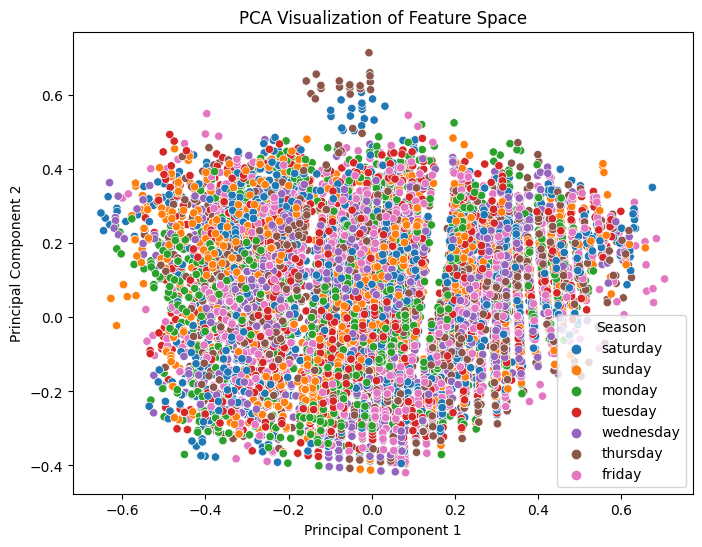

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'weekday'
features = ['temp', 'atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Season', loc='best')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Logistic Regression Metrics:
Accuracy: 0.6964902186421174
Precision: 0.6383385333356978
Recall: 0.6964902186421174
F1 Score: 0.6371725337392732


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

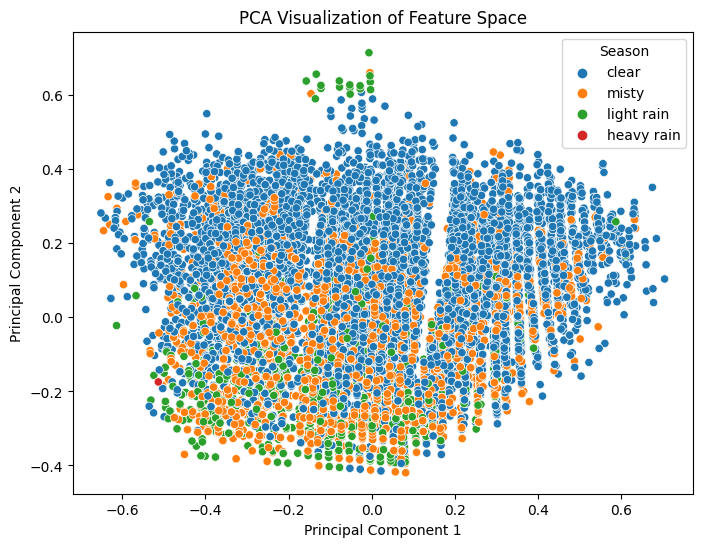

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'weathersit'
features = ['temp', 'atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Season', loc='best')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Logistic Regression Metrics:
Accuracy: 0.07249712313003452
Precision: 0.06096864702981234
Recall: 0.07249712313003452
F1 Score: 0.05417636111832416


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


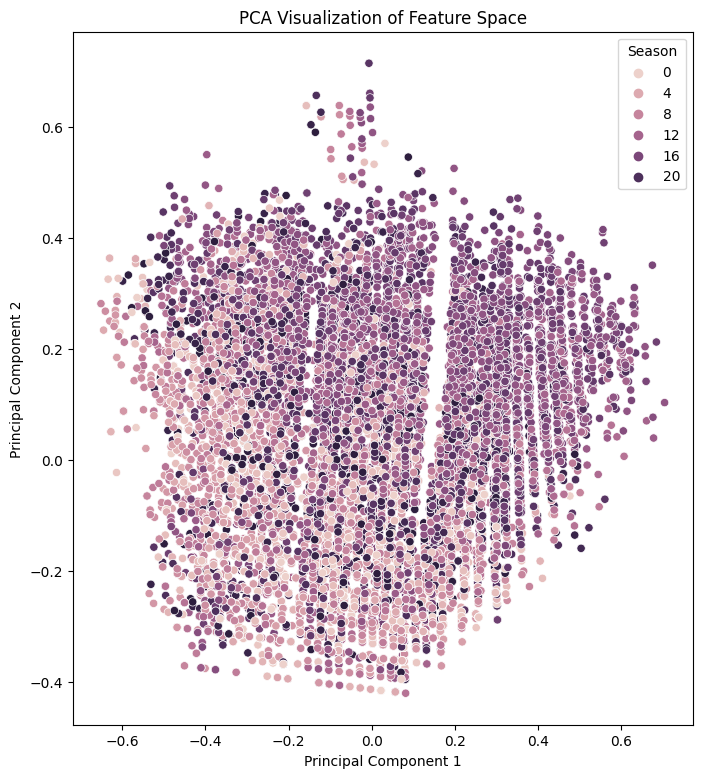

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'hr'
features = ['temp', 'atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 9))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Season', loc='best')
plt.show()



Explore and implement one advanced classification technique such as knearest
neighbors, naive Bayes, etc. Compare their performance with the
baseline.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/imtiyazuddinshaik/Downloads/BikeSharingDataset.csv')

target = 'hr'
features = ['temp', 'atemp', 'hum', 'windspeed']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average='weighted')
recall = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Initialize KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN- Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report for KNN :')
print(classification_report(y_test, y_pred))

Baseline Logistic Regression Metrics:
Accuracy: 0.07249712313003452
Precision: 0.06096864702981234
Recall: 0.07249712313003452
F1 Score: 0.05417636111832416
KNN- Accuracy: 0.05
Classification Report for KNN :
              precision    recall  f1-score   support

           0       0.05      0.16      0.07       152
           1       0.03      0.09      0.05       142
           2       0.03      0.06      0.04       127
           3       0.05      0.07      0.06       167
           4       0.04      0.05      0.05       129
           5       0.02      0.03      0.03       135
           6       0.08      0.08      0.08       153
           7       0.04      0.03      0.03       164
           8       0.05      0.04      0.04       142
           9       0.03      0.03      0.03       143
          10       0.05      0.05      0.05       143
          11       0.05      0.04      0.05       148
          12       0.06      0.06      0.06       138
          13       0.08      0.08 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
